dataset is loaded


/tmp/ipython-input-9-290640674.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)


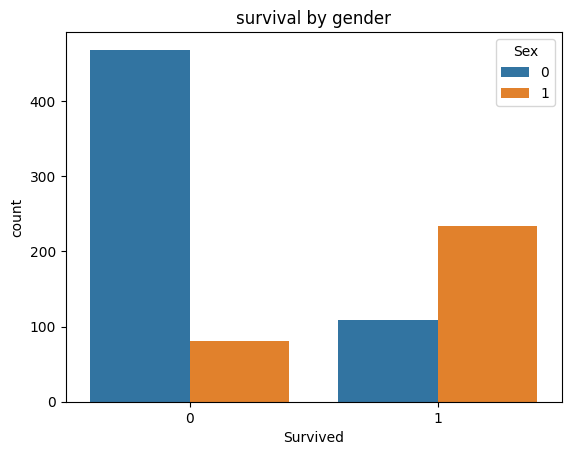

accuracy: 83.24 %


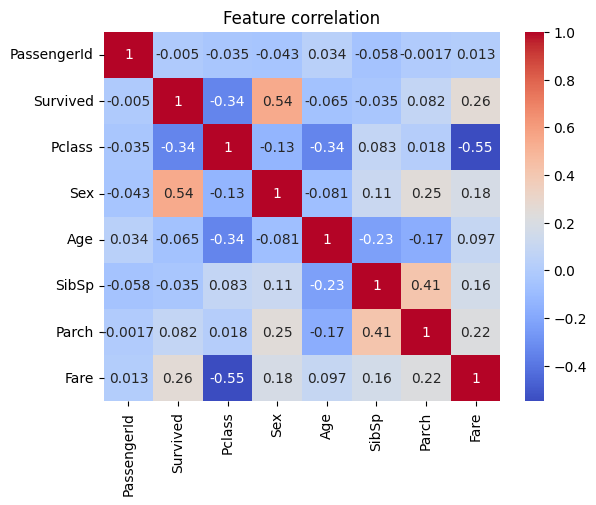

In [9]:
#codsoft internship data science task 1 titanic dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_titanic = pd.read_csv("Titanic-Dataset.csv")
print("dataset is loaded")

# preprocessing the data
df_titanic['Age'].fillna(df_titanic['Age'].median(), inplace=True)
df_titanic.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_titanic.dropna(inplace=True)

# converting categorical to numeric
df_titanic['Sex'] = df_titanic['Sex'].map({'male': 0, 'female': 1})

# visualization
sns.countplot(data=df_titanic, x='Survived', hue='Sex')
plt.title("survival by gender")
plt.show()

# split data
from sklearn.model_selection import train_test_split
X_t = df_titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y_t = df_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=10)

# train logistic model
from sklearn.linear_model import LogisticRegression
titanic_model = LogisticRegression()
titanic_model.fit(X_train, y_train)

# prediction and accuracy
from sklearn.metrics import accuracy_score
tpred = titanic_model.predict(X_test)
print("accuracy:", round(accuracy_score(y_test, tpred) * 100, 2), "%")

# correlation heatmap
sns.heatmap(df_titanic.corr(), annot=True, cmap="coolwarm")
plt.title("Feature correlation")
plt.show()
